## 뉴스 기사 분류 - 다중 분류 연습문제
- 로이터 뉴스 기사 분류
- 46개의 주제로 이루어진 뉴스 기사 분류
- keras.datasets의 reuters 데이터 
- (1) 데이터 준비 
- (2) 모델링 (64, 64, 46)
- (3) 시각화 
- (4) 재학습 / 시각화
- (5) 예측 

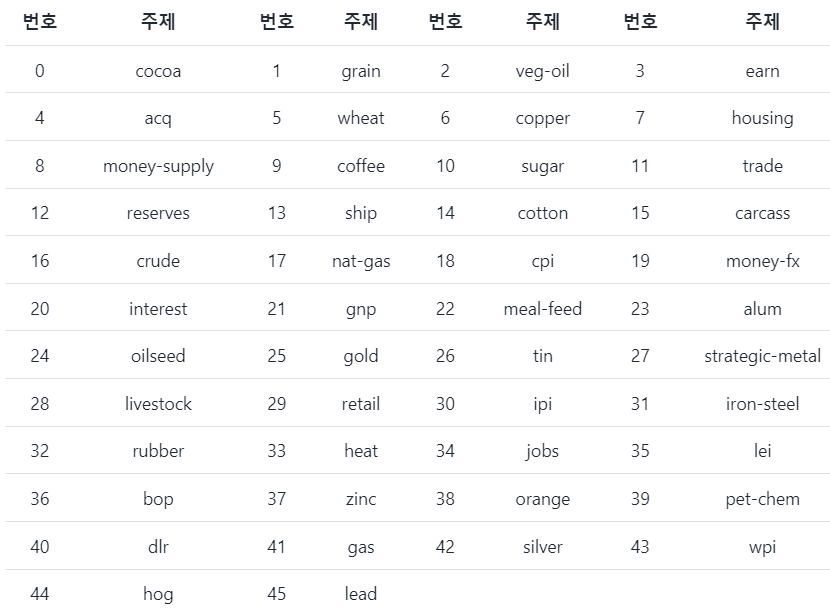

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
from keras.datasets import reuters
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = reuters.load_data()

In [3]:
X_train_raw.shape
X_test_raw.shape
y_train_raw.shape
y_test_raw.shape

(8982,)

(2246,)

(8982,)

(2246,)

In [4]:
X_train_raw[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
y_train_raw[:10]
y_train_raw.dtype

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

dtype('int64')

In [6]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(val, key) for key, val in word_index.items()])
decoded_review = ' '.join([reversed_word_index.get(i-3, '<???>') for i in X_train_raw[0]])
decoded_review

'<???> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
max_idx = max([max(x) for x in X_train_raw])
max_idx

30981

In [8]:
import numpy as np

def vectorize(sequences, dim=10000):
    arr = np.zeros((len(sequences), dim))
    for idx, seq in enumerate(sequences):
        arr[idx, seq] += 1
    return arr

In [9]:
from keras.utils import to_categorical
X_train = vectorize(X_train_raw, dim=max_idx+1)
X_test = vectorize(X_test_raw, dim=max_idx+1)
y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)

In [10]:
X_val = X_train[:6500]
X_tr = X_train[6500:]
y_val = y_train[:6500]
y_tr = y_train[6500:]

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# 모델 생성
model_news = Sequential()

model_news.add(Dense(units=64, input_dim=max_idx+1, activation='relu'))
model_news.add(Dense(units=64, activation='relu'))
model_news.add(Dense(units=46, activation='sigmoid'))

# 컴파일
model_news.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

2023-12-04 15:38:08.250221: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-04 15:38:08.250238: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-04 15:38:08.250242: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-04 15:38:08.250267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-04 15:38:08.250282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
history = model_news.fit(x=X_val, y=y_val, epochs=5, batch_size=5, validation_data=(X_tr, y_tr))

Epoch 1/5
   6/1300 [..............................] - ETA: 13s - loss: 3.7762 - accuracy: 0.1000     

2023-12-04 15:38:09.882048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1300/1300 [==============================] - 16s 12ms/step - loss: 1.2728 - accuracy: 0.7209 - val_loss: 0.9397 - val_accuracy: 0.7957
Epoch 2/5
1300/1300 [==============================] - 15s 12ms/step - loss: 0.4593 - accuracy: 0.8994 - val_loss: 1.0224 - val_accuracy: 0.7981
Epoch 3/5
1300/1300 [==============================] - 15s 12ms/step - loss: 0.2291 - accuracy: 0.9486 - val_loss: 1.0731 - val_accuracy: 0.7945
Epoch 4/5
1300/1300 [==============================] - 15s 12ms/step - loss: 0.1904 - accuracy: 0.9557 - val_loss: 1.1979 - val_accuracy: 0.7949
Epoch 5/5
1300/1300 [==============================] - 15s 12ms/step - loss: 0.1630 - accuracy: 0.9598 - val_loss: 1.2031 - val_accuracy: 0.7905


<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

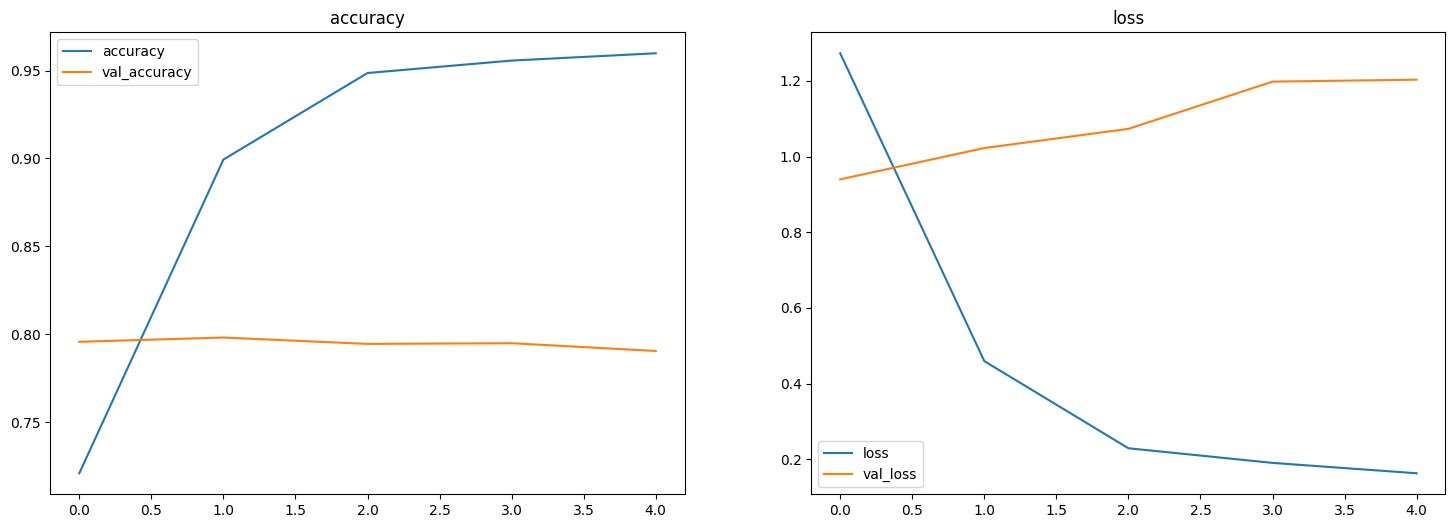

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()